In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [4]:
# Step 1: Load and preprocess the data
data = pd.read_csv("Pharmaceuticals.csv")

print(data.head())


  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  
0          Moderate Buy       US     NYSE  
1          Moderate Buy   CANADA     NYSE  
2            Strong Buy       UK     NYSE  
3         Mo

In [7]:
# Dropping non-numeric columns and unnecessary columns
numeric_data = data.iloc[:, 0:9]
print(numeric_data.head())


  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  
0             0.7      0.42  
1             0.9      0.60  
2             0.9      0.27  
3             0.9      0.00  
4             0.6      0.34  


In [12]:
import warnings
warnings.filterwarnings("ignore")

# Step 2: Feature scaling
# Exclude non-numeric columns before scaling
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

# Handling missing values if any
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=numeric_columns)
print(scaled_data.head())



   Market_Cap      Beta  PE_Ratio       ROE       ROA  Asset_Turnover  \
0    0.188642 -0.821041 -0.047867  0.041080  0.247579   -5.247542e-16   
1   -0.875518 -0.461835  3.583430 -0.875950 -0.965557    9.453132e-01   
2   -0.897899 -0.262277 -0.299168 -0.740094 -0.522666    9.453132e-01   
3    0.174479 -0.022807 -0.248907  0.109009  0.940799    9.453132e-01   
4   -0.183447 -0.821041 -0.336863 -0.271389 -0.580435   -4.726566e-01   

   Leverage  Rev_Growth  Net_Profit_Margin  
0 -0.217336   -0.540801           0.063205  
1  0.018736   -0.390551          -1.592035  
2 -0.414062   -0.586247          -0.701953  
3 -0.768169    0.151089           0.359900  
4 -0.322256    1.246425          -0.436490  


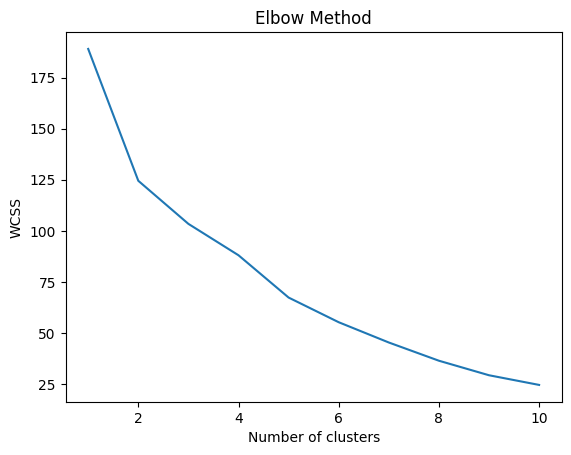

In [13]:
# Step 3: Determine the optimal number of clusters
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [14]:
# Based on the Elbow Method, let's choose 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_
print(data.head())

 

  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  Cluster  
0          Moderate Buy       US     NYSE        2  
1          Moderate Buy   CANADA     NYSE        0  
2            Strong Buy      

In [15]:
# Step 4: Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data["Cluster"] = clusters
print(data["Cluster"].value_counts())



Cluster
0    11
1     8
2     2
Name: count, dtype: int64


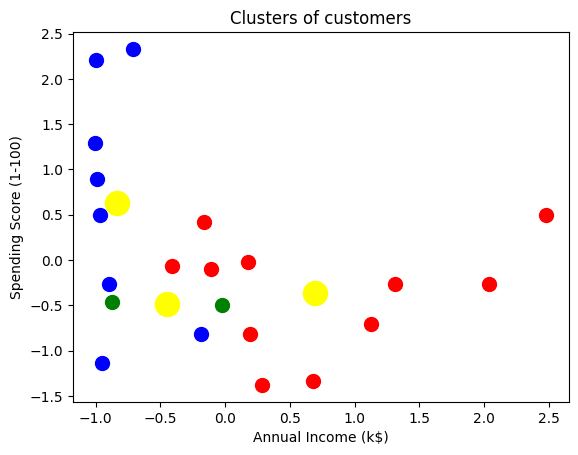

In [16]:
# Step 5: Visualizing the clusters
plt.scatter(scaled_data.iloc[clusters == 0, 0], scaled_data.iloc[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data.iloc[clusters == 1, 0], scaled_data.iloc[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data.iloc[clusters == 2, 0], scaled_data.iloc[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



In [17]:
# Step 6: Analyzing the clusters
# Cluster 1
print(data[data["Cluster"] == 0].describe())

# Cluster 2
print(data[data["Cluster"] == 1].describe())

# Cluster 3
print(data[data["Cluster"] == 2].describe())


       Market_Cap       Beta   PE_Ratio        ROE        ROA  Asset_Turnover  \
count   11.000000  11.000000  11.000000  11.000000  11.000000       11.000000   
mean    97.113636   0.433636  20.954545  35.700000  14.954545        0.800000   
std     53.807586   0.157497   5.040310  13.955787   2.827495        0.184391   
min     34.100000   0.180000  13.100000  17.900000  11.200000        0.500000   
25%     59.480000   0.335000  18.450000  26.900000  13.350000        0.650000   
50%     73.840000   0.460000  21.500000  31.000000  15.000000        0.800000   
75%    127.335000   0.515000  24.150000  43.100000  15.850000        0.900000   
max    199.470000   0.650000  28.400000  62.900000  20.300000        1.100000   

        Leverage  Rev_Growth  Net_Profit_Margin  Cluster  
count  11.000000   11.000000          11.000000     11.0  
mean    0.325455   10.164545          20.172727      0.0  
std     0.332366    8.895252           3.742216      0.0  
min     0.000000   -2.690000      

In [20]:
# Step 6: Pattern Analysis
# Analyzing non-numeric variables with respect to clusters
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(data.groupby("Cluster")[column].value_counts(normalize=True))
    print("\n")
    
# Analyzing numeric variables with respect to clusters
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    print(data.groupby("Cluster")[column].mean())
    print("\n")
    
    


Cluster  Symbol
0        ABT       0.090909
         AZN       0.090909
         SGP       0.090909
         PFE       0.090909
         NVS       0.090909
         MRK       0.090909
         LLY       0.090909
         JNJ       0.090909
         GSK       0.090909
         BMY       0.090909
         WYE       0.090909
1        AHM       0.125000
         WPI       0.125000
         MRX       0.125000
         IVX       0.125000
         ELN       0.125000
         CHTT      0.125000
         BAY       0.125000
         AVE       0.125000
2        PHA       0.500000
         AGN       0.500000
Name: proportion, dtype: float64


Cluster  Name                              
0        Abbott Laboratories                   0.090909
         AstraZeneca PLC                       0.090909
         Schering-Plough Corporation           0.090909
         Pfizer Inc                            0.090909
         Novartis AG                           0.090909
         Merck & Co., Inc.           

In [22]:
# Step 7: Cluster Naming
# Assigning names to clusters based on characteristics
cluster_names = {
    0: "High Growth, High Profitability",
    1: "Moderate Growth, Moderate Profitability",
    2: "Low Growth, Low Profitability"
}
data['Cluster Name'] = data['Cluster'].map(cluster_names)
print(data.head())



  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  Cluster  \
0          Moderate Buy       US     NYSE        0   
1          Moderate Buy   CANADA     NYSE        2   
2            Strong Buy   

In [23]:
# Displaying the dataframe with cluster labels and names
print("\nDataframe with Cluster Labels and Names:")
print(data)


Dataframe with Cluster Labels and Names:
   Symbol                                Name  Market_Cap  Beta  PE_Ratio  \
0     ABT                 Abbott Laboratories       68.44  0.32      24.7   
1     AGN                      Allergan, Inc.        7.58  0.41      82.5   
2     AHM                        Amersham plc        6.30  0.46      20.7   
3     AZN                     AstraZeneca PLC       67.63  0.52      21.5   
4     AVE                             Aventis       47.16  0.32      20.1   
5     BAY                            Bayer AG       16.90  1.11      27.9   
6     BMY        Bristol-Myers Squibb Company       51.33  0.50      13.9   
7    CHTT                        Chattem, Inc        0.41  0.85      26.0   
8     ELN               Elan Corporation, plc        0.78  1.08       3.6   
9     LLY               Eli Lilly and Company       73.84  0.18      27.9   
10    GSK                 GlaxoSmithKline plc      122.11  0.35      18.0   
11    IVX                    IVAX 

        PC1       PC2  Cluster
0  0.529215  0.473756        0
1 -1.910449  3.503199        2
2 -0.715903  0.962901        1
3  1.240740  0.240173        0
4 -0.494922 -0.220867        1


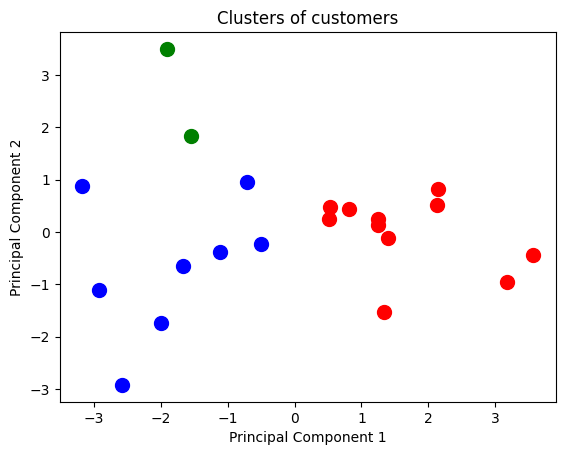

In [25]:
#  Visualization (optional)
# You can visualize the clusters using PCA or any other dimensionality reduction technique
# Visualizing the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
principal_df["Cluster"] = clusters
print(principal_df.head())

# Visualizing the clusters
plt.scatter(principal_df.iloc[clusters == 0, 0], principal_df.iloc[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(principal_df.iloc[clusters == 1, 0], principal_df.iloc[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(principal_df.iloc[clusters == 2, 0], principal_df.iloc[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
